In [22]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.stats as stats
import qp
import sacc
import yaml
import scipy.stats as stats

import nz_prior as nz
import pacc

In [78]:

# Ensembles
method = "bpz"
source_0 = np.load('/home/jaimerz/Documents/UCL/3x2_analytical/data/CosmoDC2/image_nzs_{}/shear_0.npz'.format(method), allow_pickle=True)
z = source_0['znodes']
nz = source_0['photo_hists'][:, 0]
nz = nz/nz.sum()

M = 6
dz = (np.max(z) - np.min(z))/M 
zmeans = [(np.min(z)+dz/2) + i*dz for i in range(M)]
combs = {}
for i in np.arange(M):
    combs[i] =  stats.norm(zmeans[i], dz/2)

In [79]:
# Redshift distribution of comb components (see eq.2 and eq.3)
def K(z,z_mean,sigma):
    return(z*np.exp(-(z-z_mean)**2/(2*sigma**2))/(np.sqrt(np.pi/2)*z_mean*sigma*special.erfc(-z_mean/(np.sqrt(2)*sigma))+sigma**2*np.exp(-z_mean**2/(2*sigma**2))))

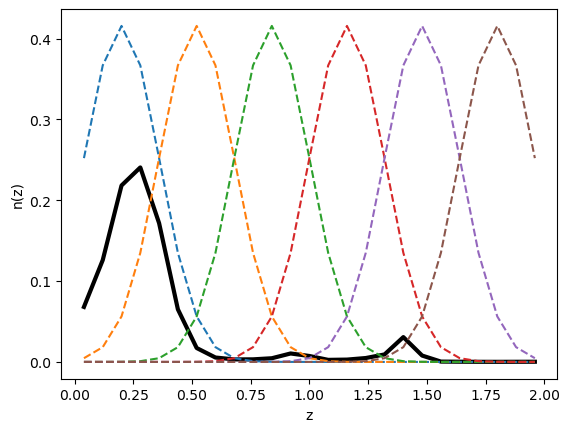

In [80]:
plt.plot(z, nz, 'k-', lw=3)
for i in np.arange(M):
    plt.plot(z, (1/M)*combs[i].pdf(z), '--')
plt.xlabel('z')
plt.ylabel('n(z)')
plt.show()

In [81]:
W = [np.dot(nz, combs[i].pdf(z)) for i in np.arange(M)]
W = W/np.sum(W)

nz_pred = np.zeros_like(z)
for i in np.arange(M):
    nz_pred += (W[i]/M)*combs[i].pdf(z)

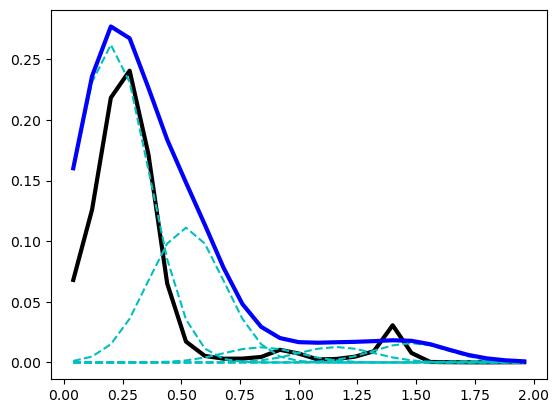

In [82]:
plt.plot(z, nz, 'k-', lw=3)
for i in np.arange(M):
    plt.plot(z, (1/M)*W[i]*combs[i].pdf(z), 'c--')
plt.plot(z, nz_pred, 'b-', lw=3)
